<a href="https://colab.research.google.com/github/guizucolotto/Spotfy-Analysis/blob/main/Spotfy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotify
!pip install spotipy

In [ ]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from math import pi
import numpy as np

In [ ]:
#Retrieve Client credentials from Spotify Developer Page
client_id = '8ae3862729ff49e0a9b043e56d5ac992'
client_secret = ''

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

#Retrieve playlist_id by getting the Spotify URI of any playlist
playlist_id = "spotify:playlist:6kevA74U0npbbL1G9s03F6"
results = sp.playlist(playlist_id)
extra_results = sp.playlist_items(playlist_id)

min_max_scaler = MinMaxScaler()

In [ ]:
playlists = sp.user_playlists('12185137896')
while playlists:
    for i, playlist in enumerate(playlists['items']):
        print("%4d %s %s" % (i + 1 + playlists['offset'], playlist['uri'],  playlist['name']))
    if playlists['next']:
        playlists = sp.next(playlists)
    else:
        playlists = None

   1 spotify:playlist:5affVGhZs1O8M4dsgxgo9t Emo never dies 🖤
   2 spotify:playlist:3uiR71GbiGVSOJu2zvBdB3 2022
   3 spotify:playlist:2T9LqhVj66L467pTbwQJx9 2020 /2021
   4 spotify:playlist:18I7Y1RGVEbdtrotY2M3KS CORTEJO
   5 spotify:playlist:7JuSRbwbIeXJ6QqezoubWt RECEPÇÃO CASAMENTO
   6 spotify:playlist:59buMr9Qg67kINCwPnI7oN 30 anos
   7 spotify:playlist:36vSTrLwrwOMcKEHqd2mwg Aula Dance Up
   8 spotify:playlist:2MM7SztydQMLkWLvw7JXX2 Aula Dance Zen
   9 spotify:playlist:2M8IGLNDz9FVK8GJ688jGt Aula Cadillac Dance
  10 spotify:playlist:4XcBxKcHFWuYuyhJuqRfHR Aula Pilates Variadas
  11 spotify:playlist:3W2QBLi1SEsjyftNeUeI4C 2017 / Campos 
  12 spotify:playlist:2YJecgCLnMiSUnkxmWFdjF Praia
  13 spotify:playlist:1AS3T503OlGfKrn5gZwIHT Someday We'll Know – New Radicals
  14 spotify:playlist:4Ou1rdjKjzECSuBmEJTrgH Trip
  15 spotify:playlist:7B1b9ps6ePczJGYXvfuaH5 chão
  16 spotify:playlist:37i9dQZF1DWTkxQvqMy4WW Chillin' on a Dirt Road
  17 spotify:playlist:37i9dQZF1DX6ziVCJnEm59 Your Fa

In [ ]:
results['tracks']['items'][0]['track']['name']

'Favorite Liar'

In [ ]:
#Function to Convert JSON to Dataframe
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)


# create artist information
artists = []
generos = []

for item in extra_results['items']:
    artist_id = item['track']['artists'][0]['uri']
    genres = sp.artist(artist_id)['genres']

    artists.append(artist_id)
    generos.append(genres)

#combine data
final_df['artist_id'] = artists
final_df['generos'] = generos


In [ ]:
#sp.artist("3YQKmKGau1PzlVlkL1iodx")['genres']

In [ ]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature,artist_id,generos
0,2fOmsaSjCncWDVJ1N8S2TZ,We Are the Wrecks,Favorite Liar,The Wrecks,False,0,0.643,0.737,9,-3.467,...,0.319,119.974,audio_features,spotify:track:2fOmsaSjCncWDVJ1N8S2TZ,https://api.spotify.com/v1/tracks/2fOmsaSjCncW...,https://api.spotify.com/v1/audio-analysis/2fOm...,4.037500,4,spotify:artist:458aS6ALc3QkzwfR5USt34,"[la indie, modern alternative rock, modern roc..."
1,39bpQHvHkE0K7UUD2HL9oI,Cocoon,Cocoon,Milky Chance,False,0,0.732,0.708,10,-5.978,...,0.749,114.033,audio_features,spotify:track:39bpQHvHkE0K7UUD2HL9oI,https://api.spotify.com/v1/tracks/39bpQHvHkE0K...,https://api.spotify.com/v1/audio-analysis/39bp...,4.233550,4,spotify:artist:1hzfo8twXdOegF3xireCYs,[german pop]
2,4AyoAGuhE8gydBPrczuhbl,When It Was Now (Deluxe Edition),Trojans,Atlas Genius,False,50,0.721,0.822,7,-4.843,...,0.536,140.002,audio_features,spotify:track:4AyoAGuhE8gydBPrczuhbl,https://api.spotify.com/v1/tracks/4AyoAGuhE8gy...,https://api.spotify.com/v1/audio-analysis/4Ayo...,3.623117,4,spotify:artist:42vg2T0Xg9yPaAgogJzoQH,"[indie poptimism, indietronica, modern alterna..."
3,5hc71nKsUgtwQ3z52KEKQk,"I like it when you sleep, for you are so beaut...",Somebody Else,The 1975,True,74,0.610,0.788,0,-5.724,...,0.472,101.045,audio_features,spotify:track:5hc71nKsUgtwQ3z52KEKQk,https://api.spotify.com/v1/tracks/5hc71nKsUgtw...,https://api.spotify.com/v1/audio-analysis/5hc7...,5.792000,4,spotify:artist:3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, rock]"
4,2JHBMVs8E7bJJBLkXpKgHn,Babel,I Will Wait,Mumford & Sons,False,0,0.481,0.766,1,-5.208,...,0.436,131.143,audio_features,spotify:track:2JHBMVs8E7bJJBLkXpKgHn,https://api.spotify.com/v1/tracks/2JHBMVs8E7bJ...,https://api.spotify.com/v1/audio-analysis/2JHB...,4.612000,4,spotify:artist:3gd8FJtBJtkRxdfbTu19U2,"[modern folk rock, modern rock, pop rock, stom..."


In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   album             100 non-null    object 
 2   name              100 non-null    object 
 3   artist            100 non-null    object 
 4   explicit          100 non-null    bool   
 5   popularity        100 non-null    int64  
 6   danceability      100 non-null    float64
 7   energy            100 non-null    float64
 8   key               100 non-null    int64  
 9   loudness          100 non-null    float64
 10  mode              100 non-null    int64  
 11  speechiness       100 non-null    float64
 12  acousticness      100 non-null    float64
 13  instrumentalness  100 non-null    float64
 14  liveness          100 non-null    float64
 15  valence           100 non-null    float64
 16  tempo             100 non-null    float64
 17

In [ ]:
#Function for Data Pre-Processing
music_features=features_df[['danceability','energy','loudness','speechiness',
                            'acousticness','instrumentalness','liveness','valence',
                            'tempo','duration_ms']]

music_features.describe()
#Transforming Data so that all values are in the range 0 to 1
#To turn of warning run below command
pd.set_option('mode.chained_assignment', None)
music_features.loc[:]=min_max_scaler.fit_transform(music_features.loc[:])

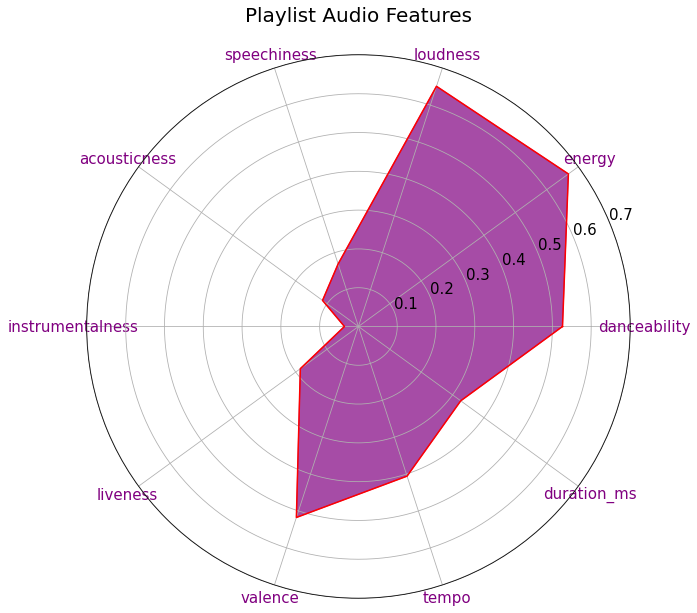

In [ ]:
#Radar Chart with several heads from DataFrame
#Creating Radar Chart
fig = plt.figure(figsize=(10,10))

categories=list(music_features.columns)

N=len(categories)

value = list(music_features.mean())

value+=value[:1]
angles = [n/float(N)*2*pi for n in range(N)]
angles+= angles[:1]


plt.polar(angles,value,color='red')
plt.fill(angles,value,alpha=0.7,color='purple')

plt.title('Playlist Audio Features', size=20, y=1.05)

plt.xticks(angles[:-1],categories,size=15, color='purple')
plt.yticks(color='black', size=15)
plt.show()

In [ ]:
print(f'{sp.artist_related_artists(final_df["artist_id"][0])["artists"][0]["genres"]}')
print(f'{sp.artist_related_artists(final_df["artist_id"][0])["artists"][0]["name"]}')

['oakland indie']
SWMRS


In [ ]:
df_generos = final_df.explode('generos').copy()

In [ ]:
df_generos.groupby(["generos"]).count()['id'].reset_index()

,generos,id
0,alternative dance,11
1,alternative rock,5
2,arkansas indie,1
3,austindie,1
4,australian indie folk,1
...,...,...
72,swedish synthpop,1
73,tropical house,1
74,uk americana,4
75,vapor soul,4


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  # This is added back by InteractiveShellApp.init_path()


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 33 Text major ticklabel objects>)

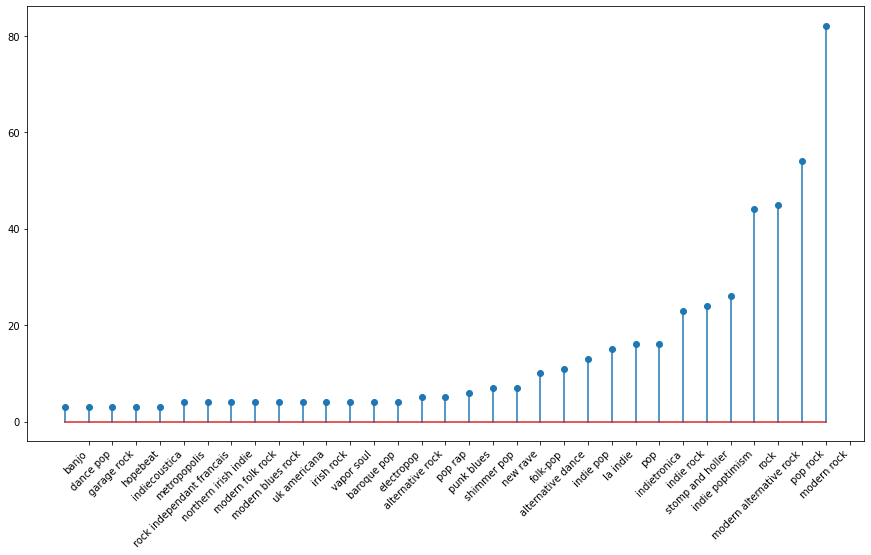

In [ ]:
plt.figure(figsize=(15,8))

df = (df_generos.groupby(["generos"]).count()['id'].reset_index())
to_graph = df[df['id']>=3]

# Reorder it following the values:
ordered_df = to_graph.sort_values(by='id')
my_range=range(1,len(to_graph.index)+1)

# Make the plot
plt.stem(ordered_df['id'])
plt.xticks( my_range, ordered_df['generos'])
plt.xticks(rotation=45, ha='right')

In [ ]:
sp.artist_related_artists(final_df["artist_id"][0])["artists"][2]["name"]

'Anarbor'

In [ ]:
art1 = []
idd1 = []
art2 = []
idd2 = []
art3 = []
idd3 = []

for i in range(final_df.shape[0]):

  ar1=sp.artist_related_artists(final_df["artist_id"][i])["artists"][0]["name"]
  ar2=sp.artist_related_artists(final_df["artist_id"][i])["artists"][1]["name"]
  ar3=sp.artist_related_artists(final_df["artist_id"][i])["artists"][2]["name"]
  id1 = sp.artist_related_artists(final_df["artist_id"][i])["artists"][0]["id"]
  id2 = sp.artist_related_artists(final_df["artist_id"][i])["artists"][1]["id"]
  id3 = sp.artist_related_artists(final_df["artist_id"][i])["artists"][2]["id"]
  art1.append(ar1)
  art2.append(ar2)
  art3.append(ar3)
  idd1.append(id1)
  idd2.append(id2)
  idd3.append(id3)


final_df['Art_recomendado1'] = art1
final_df['IDArt1'] = idd1
final_df['Art_recomendado2'] = art2
final_df['IDArt2'] = idd2
final_df['Art_recomendado3'] = art3
final_df['IDArt3'] = idd3

In [ ]:
final_df.head()

,id,album,name,artist,explicit,popularity,danceability,energy,key,loudness,...,duration_ms,time_signature,artist_id,generos,Art_recomendado1,IDArt1,Art_recomendado2,IDArt2,Art_recomendado3,IDArt3
0,2fOmsaSjCncWDVJ1N8S2TZ,We Are the Wrecks,Favorite Liar,The Wrecks,False,0,0.643,0.737,9,-3.467,...,4.037500,4,spotify:artist:458aS6ALc3QkzwfR5USt34,"[la indie, modern alternative rock, modern roc...",SWMRS,7dLkuQHF2ijbK6jiLFyIWM,Waterparks,3QaxveoTiMetZCMp1sftiu,Anarbor,09J4zbHHwNNlN2tfgJIg21
1,39bpQHvHkE0K7UUD2HL9oI,Cocoon,Cocoon,Milky Chance,False,0,0.732,0.708,10,-5.978,...,4.233550,4,spotify:artist:1hzfo8twXdOegF3xireCYs,[german pop],FIL BO RIVA,3JE0uoggWwwYG6rSSJk0HN,Lewis Del Mar,2oqwwcM17wrP9hBD25zKSR,Von Wegen Lisbeth,0uNoScPvcAL4krqNZfeJBq
2,4AyoAGuhE8gydBPrczuhbl,When It Was Now (Deluxe Edition),Trojans,Atlas Genius,False,50,0.721,0.822,7,-4.843,...,3.623117,4,spotify:artist:42vg2T0Xg9yPaAgogJzoQH,"[indie poptimism, indietronica, modern alterna...",St. Lucia,5WId4o5jdGVhptNU0uqKxu,Youngblood Hawke,6VXZCpbkwm0W0aPjQR1t4K,The Royal Concept,7LAucJAvbQa7ZIA0qP8YI2
3,5hc71nKsUgtwQ3z52KEKQk,"I like it when you sleep, for you are so beaut...",Somebody Else,The 1975,True,74,0.610,0.788,0,-5.724,...,5.792000,4,spotify:artist:3mIj9lX2MWuHmhNCA7LSCW,"[modern alternative rock, modern rock, pop, rock]",Declan McKenna,2D4FOOOtWycb3Aw9nY5n3c,The Japanese House,3IunaFjvNKj98JW89JYv9u,Bad Suns,0YhUSm86okLWldQVwJkLlP
4,2JHBMVs8E7bJJBLkXpKgHn,Babel,I Will Wait,Mumford & Sons,False,0,0.481,0.766,1,-5.208,...,4.612000,4,spotify:artist:3gd8FJtBJtkRxdfbTu19U2,"[modern folk rock, modern rock, pop rock, stom...",Noah And The Whale,0aeLcja6hKzb7Uz2ou7ulP,Of Monsters and Men,4dwdTW1Lfiq0cM8nBAqIIz,Edward Sharpe & The Magnetic Zeros,7giUHu5pv6YTZgSkxxCcgh


In [ ]:
print(f'{final_df["Art_recomendado1"].value_counts().head(5)}')
print(f'{final_df["IDArt1"].value_counts().head(5)}')
print(f'{final_df["Art_recomendado2"].value_counts().head(5)}')
print(f'{final_df["IDArt2"].value_counts().head(5)}')
print(f'{final_df["Art_recomendado3"].value_counts().head(5)}')
print(f'{final_df["IDArt3"].value_counts().head(5)}')

Grouplove              11
Passion Pit             5
American Authors        5
Noah And The Whale      4
Bombay Bicycle Club     4
Name: Art_recomendado1, dtype: int64
3kVUvbeRdcrqQ3oHk5hPdx    11
7gjAu1qr5C2grXeQFFOGeh     5
0MlOPi3zIDMVrfA9R04Fe3     5
0aeLcja6hKzb7Uz2ou7ulP     4
3pTE9iaJTkWns3mxpNQlJV     4
Name: IDArt1, dtype: int64
Passion Pit            8
Of Monsters and Men    6
WALK THE MOON          5
Grizfolk               5
Cold War Kids          4
Name: Art_recomendado2, dtype: int64
7gjAu1qr5C2grXeQFFOGeh    8
4dwdTW1Lfiq0cM8nBAqIIz    6
6DIS6PRrLS3wbnZsf7vYic    5
6Xa4nbrSTfbioA4lLShbjh    5
6VDdCwrBM4qQaGxoAyxyJC    4
Name: IDArt2, dtype: int64
Young the Giant          6
Fitz and The Tantrums    5
Local Natives            5
Miike Snow               4
The Wombats              4
Name: Art_recomendado3, dtype: int64
4j56EQDQu5XnL7R3E9iFJT    6
4AcHt3JxKy59IX7JNNlZn4    5
75dQReiBOHN37fQgWQrIAJ    5
4l1cKWYW591xnwEGxpUg3J    4
0Ya43ZKWHTKkAbkoJJkwIB    4
Name: IDArt3, dtype:

In [ ]:
print(f'{final_df["Art_recomendado1"].value_counts().head(5)}')
#print(f'{final_df["IDArt1"].value_counts().head(5)}')
print(f'{final_df["Art_recomendado2"].value_counts().head(5)}')
#print(f'{final_df["IDArt2"].value_counts().head(5)}')
print(f'{final_df["Art_recomendado3"].value_counts().head(5)}')
#print(f'{final_df["IDArt3"].value_counts().head(5)}')

Grouplove              11
Passion Pit             5
American Authors        5
Noah And The Whale      4
Bombay Bicycle Club     4
Name: Art_recomendado1, dtype: int64
Passion Pit            8
Of Monsters and Men    6
WALK THE MOON          5
Grizfolk               5
Cold War Kids          4
Name: Art_recomendado2, dtype: int64
Young the Giant          6
Fitz and The Tantrums    5
Local Natives            5
Miike Snow               4
The Wombats              4
Name: Art_recomendado3, dtype: int64


In [ ]:
song = sp.artist_top_tracks("4njdEjTnLfcGImKZu1iSrz", country='US')['tracks'][0]["id"]
print(f'{sp.track(song, market=None)["name"]}')
print(f'{sp.track(song, market=None)["album"]["artists"][0]["name"]}')

Sail
AWOLNATION


In [ ]:
generos_rec = list(df_generos.generos.value_counts().head(3).index.values)
artistas_rec = list(df_generos.artist_id.value_counts().head(2).index.values)

In [ ]:
artistas_rec

['spotify:artist:536BYVgOnRky0xjsPT96zl',
 'spotify:artist:4AcHt3JxKy59IX7JNNlZn4']

In [ ]:
sp.recommendations(seed_artists=artistas_rec, seed_genres=generos_rec)['tracks'][0]['album']['artists'][0]
seed_artista1 = sp.recommendations(seed_artists=artistas_rec, seed_genres=generos_rec)['tracks'][0]['album']['artists'][0]['uri']
seed_artista2 = sp.recommendations(seed_artists=artistas_rec, seed_genres=generos_rec)['tracks'][1]['album']['artists'][0]['uri']

In [ ]:
song = sp.artist_top_tracks(seed_artista1, country='US')['tracks'][0]["id"]
print(f'{sp.track(song, market=None)["name"]}')
print(f'{sp.track(song, market=None)["album"]["artists"][0]["name"]}')

Good Luck
Broken Bells


In [ ]:
song = sp.artist_top_tracks(seed_artista2, country='US')['tracks'][0]["id"]
print(f'{sp.track(song, market=None)["name"]}')
print(f'{sp.track(song, market=None)["album"]["artists"][0]["name"]}')

Greek Tragedy - Oliver Nelson TikTok Remix
The Wombats


In [ ]:
#sp.current_user()